<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.compose import make_column_transformer,ColumnTransformer
import pandas_profiling

In [4]:
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',35)

In [5]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2.0       0.00              1          1               1   
1        1.0   83807.86              1          0               1   
2        8.0  159660.80              3          1               0   
3        1.0       0.00              2          0               0   
4        2.0  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995     5.0       0.00              2          1               0   
9996    10.0   57369.61              1          1               1   
9997     7.0       0.00              1          0               1   
9998     3.0   75075.31              2          1               0   
9999     NaN  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

здравствуйте заглавные буквы в название столбцов 

In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


ага 900 пропусков , подумаю что можно сделать 

In [8]:
data[data['tenure'].isna()]['exited'].value_counts()

0    726
1    183
Name: exited, dtype: int64

In [9]:
data['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

дисбаланс классов +- одинаковый , тоесть впринципе можем удалить без проблем 

In [10]:
pandas_profiling.ProfileReport(data) 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

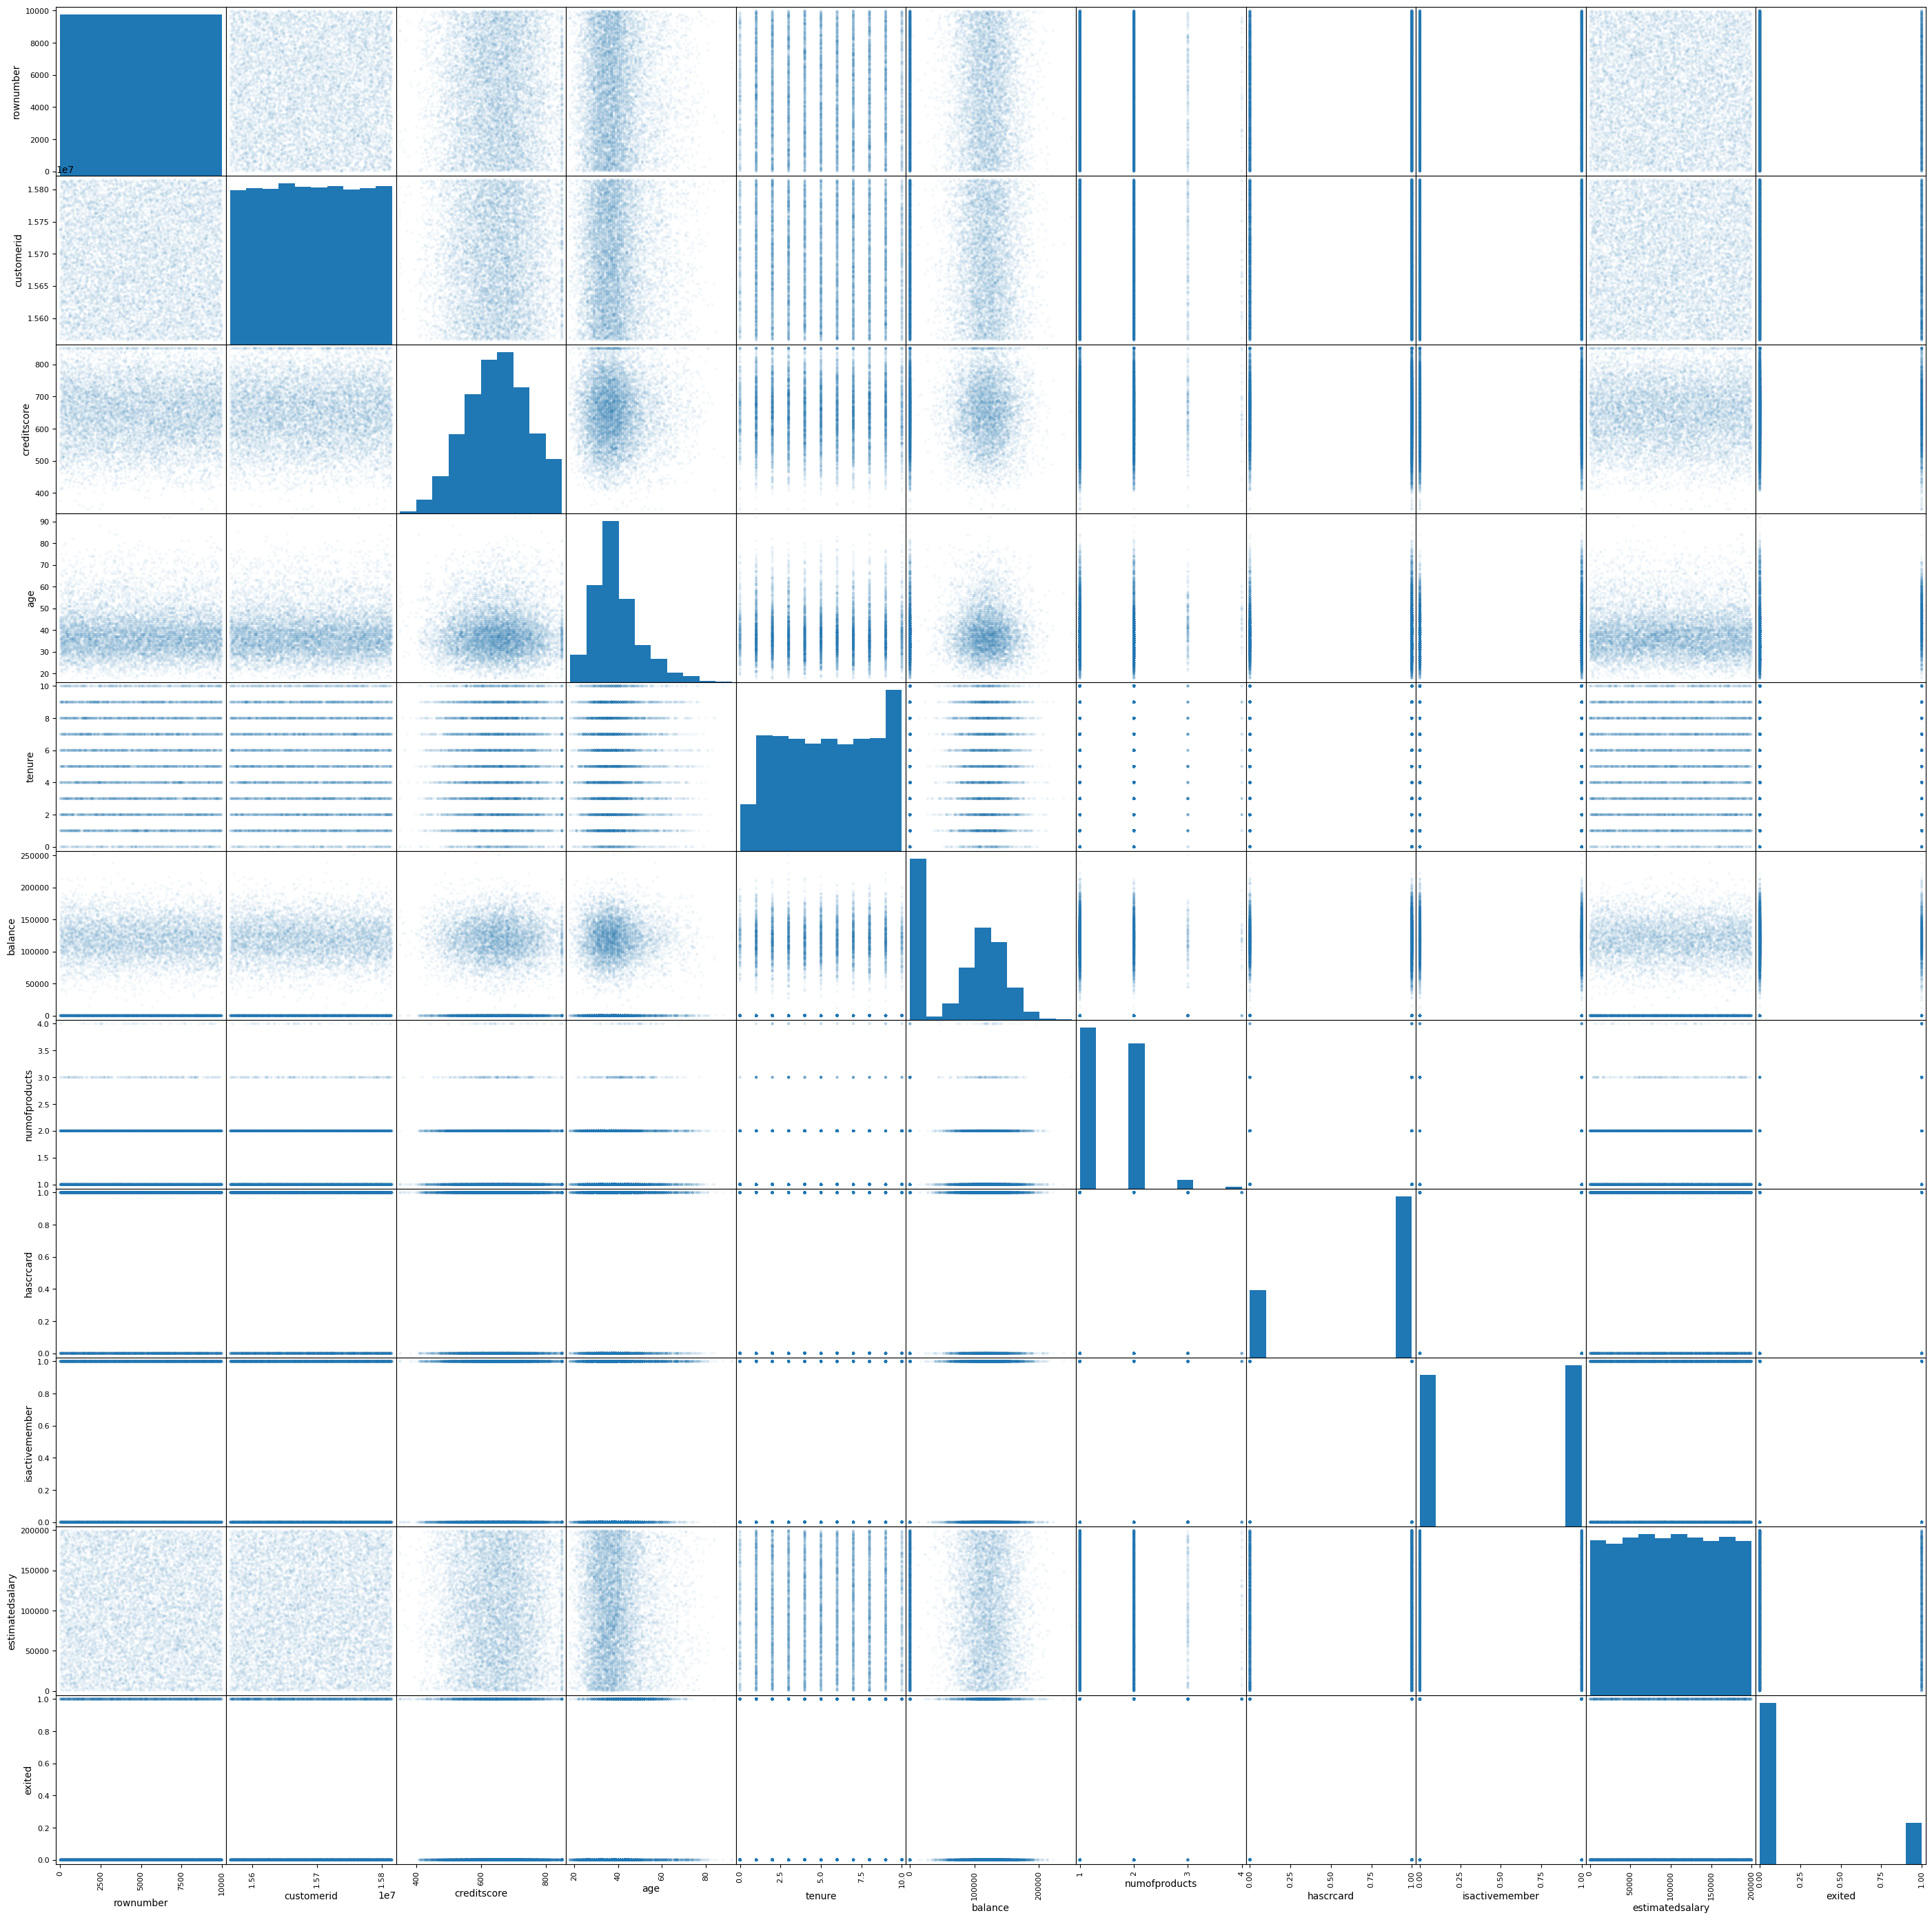

In [11]:
pd.plotting.scatter_matrix(data,figsize=(35,35),alpha=0.05)
plt.show()

In [12]:
data.corr()

rownumber  customerid  creditscore       age    tenure  \
rownumber         1.000000    0.004202     0.005840  0.000783 -0.007322   
customerid        0.004202    1.000000     0.005308  0.009497 -0.021418   
creditscore       0.005840    0.005308     1.000000 -0.003965 -0.000062   
age               0.000783    0.009497    -0.003965  1.000000 -0.013134   
tenure           -0.007322   -0.021418    -0.000062 -0.013134  1.000000   
balance          -0.009067   -0.012419     0.006268  0.028308 -0.007911   
numofproducts     0.007246    0.016972     0.012238 -0.030680  0.011979   
hascrcard         0.000599   -0.014025    -0.005458 -0.011721  0.027232   
isactivemember    0.012044    0.001665     0.025651  0.085472 -0.032178   
estimatedsalary  -0.005988    0.015271    -0.001384 -0.007201  0.010520   
exited           -0.016571   -0.006248    -0.027094  0.285323 -0.016761   

                  balance  numofproducts  hascrcard  isactivemember  \
rownumber       -0.009067       0.007246   0.000599        0.012044   
customerid      -0.012419       0.016972  -0.014025        0.001665   
creditscore      0.006268       0.012238  -0.005458        0.025651   
age              0.028308      -0.030680  -0.011721        0.085472   
tenure          -0.007911       0.011979   0.027232       -0.032178   
balance          1.000000      -0.304180  -0.014858       -0.010084   
numofproducts   -0.304180       1.000000   0.003183        0.009612   
hascrcard       -0.014858       0.003183   1.000000       -0.011866   
isactivemember  -0.010084       0.009612  -0.011866        1.000000   
estimatedsalary  0.012797       0.014204  -0.009933       -0.011421   
exited           0.118533      -0.047820  -0.007138       -0.156128   

                 estimatedsalary    exited  
rownumber              -0.005988 -0.016571  
customerid              0.015271 -0.006248  
creditscore            -0.001384 -0.027094  
age                    -0.007201  0.285323  
tenure                  0.010520 -0.016761  
balance                 0.012797  0.118533  
numofproducts           0.014204 -0.047820  
hascrcard              -0.009933 -0.007138  
isactivemember         -0.011421 -0.156128  
estimatedsalary         1.000000  0.012097  
exited                  0.012097  1.000000

присутствует слабая корреляция между numofproducts и balance

In [13]:
data.isna().sum()

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

вывод: проблемы с типом данных нет
<br>самые важные столбцы не имеют пропусков(кроме tenure)
<br>явные дубликаты отсутствуют 
<br>странных значений обнаружено были в столбце EstimatedSalary (зарплата 11 рублей или картошек , верю))

идея можно восстановить данные по уникальным значениям индекса (это сработает если индексы выдают по очереди)

In [14]:
data.sort_values(by = 'customerid')

rownumber  customerid   surname  creditscore geography  gender  age  \
1287       1288    15565701     Ferri          698     Spain  Female   39   
4198       4199    15565706  Akobundu          612     Spain    Male   35   
7090       7091    15565714  Cattaneo          601    France    Male   47   
2020       2021    15565779      Kent          627   Germany  Female   30   
3697       3698    15565796  Docherty          745   Germany    Male   48   
...         ...         ...       ...          ...       ...     ...  ...   
3411       3412    15815628    Moysey          711    France  Female   37   
8271       8272    15815645    Akhtar          481    France    Male   37   
8088       8089    15815656   Hopkins          541   Germany  Female   39   
1762       1763    15815660     Mazzi          758    France  Female   34   
5502       5503    15815690  Akabueze          614     Spain  Female   40   

      tenure    balance  numofproducts  hascrcard  isactivemember  \
1287     9.0  161993.89              1          0               0   
4198     1.0       0.00              1          1               1   
7090     1.0   64430.06              2          0               1   
2020     6.0   57809.32              1          1               0   
3697    10.0   96048.55              1          1               0   
...      ...        ...            ...        ...             ...   
3411     8.0  113899.92              1          0               0   
8271     8.0  152303.66              2          1               1   
8088     9.0  100116.67              1          1               1   
1762     1.0  154139.45              1          1               1   
5502     NaN  113348.50              1          1               1   

      estimatedsalary  exited  
1287         90212.38       0  
4198         83256.26       1  
7090         96517.97       0  
2020        188258.49       0  
3697         74510.65       0  
...               ...     ...  
3411         80215.20       0  
8271        175082.20       0  
8088        199808.10       1  
1762         60728.89       0  
5502         77789.01       0  

[10000 rows x 14 columns]

понял так сделать не получится ,айди распределены рандомно, ну и ладно не больно то и хотелось 

In [15]:
data.duplicated().sum()

0

In [16]:
data.duplicated('customerid').sum()

0

понял , не вижу за что ещё можно зацепиться , поэтому просто удалим данные 

In [17]:
data = data[~data['tenure'].isna()]

удалим столбцы которые не несут полезную информацию(в нашел случае)

In [18]:
data = data.drop(['rownumber','customerid','surname'],axis = 1)
data

creditscore geography  gender  age  tenure    balance  numofproducts  \
0             619    France  Female   42     2.0       0.00              1   
1             608     Spain  Female   41     1.0   83807.86              1   
2             502    France  Female   42     8.0  159660.80              3   
3             699    France  Female   39     1.0       0.00              2   
4             850     Spain  Female   43     2.0  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9994          800    France  Female   29     2.0       0.00              2   
9995          771    France    Male   39     5.0       0.00              2   
9996          516    France    Male   35    10.0   57369.61              1   
9997          709    France  Female   36     7.0       0.00              1   
9998          772   Germany    Male   42     3.0   75075.31              2   

      hascrcard  isactivemember  estimatedsalary  exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9994          0               0        167773.55       0  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  

[9091 rows x 11 columns]

In [19]:
data.describe()

creditscore          age       tenure        balance  numofproducts  \
count  9091.000000  9091.000000  9091.000000    9091.000000    9091.000000   
mean    650.736553    38.949181     4.997690   76522.740015       1.530195   
std      96.410471    10.555581     2.894723   62329.528576       0.581003   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     584.000000    32.000000     2.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   97318.250000       1.000000   
75%     717.000000    44.000000     7.000000  127561.890000       2.000000   
max     850.000000    92.000000    10.000000  250898.090000       4.000000   

         hascrcard  isactivemember  estimatedsalary       exited  
count  9091.000000     9091.000000      9091.000000  9091.000000  
mean      0.704983        0.515565    100181.214924     0.203938  
std       0.456076        0.499785     57624.755647     0.402946  
min       0.000000        0.000000        11.580000     0.000000  
25%       0.000000        0.000000     51227.745000     0.000000  
50%       1.000000        1.000000    100240.200000     0.000000  
75%       1.000000        1.000000    149567.210000     0.000000  
max       1.000000        1.000000    199992.480000     1.000000

большое отклонение в столбцах creditscore и estimatedsalary , creditscore ещё не так далеко от 3 std , а вот 11 картошек..

In [20]:
data.sort_values(by = 'creditscore').head(10)

creditscore geography  gender  age  tenure    balance  numofproducts  \
1838          350   Germany    Male   39     0.0  109733.20              2   
8762          350    France  Female   60     3.0       0.00              1   
1631          350     Spain    Male   54     1.0  152677.48              1   
8723          350    France    Male   51    10.0       0.00              1   
9624          350    France  Female   40     0.0  111098.85              1   
2473          351   Germany  Female   57     4.0  163146.46              1   
1962          358     Spain  Female   52     8.0  143542.36              3   
1193          363     Spain  Female   28     6.0  146098.43              3   
2579          365   Germany    Male   30     0.0  127760.07              1   
8154          367     Spain    Male   42     6.0   93608.28              1   

      hascrcard  isactivemember  estimatedsalary  exited  
1838          0               0        123602.11       1  
8762          0               0        113796.15       1  
1631          1               1        191973.49       1  
8723          1               1        125823.79       1  
9624          1               1        172321.21       1  
2473          1               0        169621.69       1  
1962          1               0        141959.11       1  
1193          1               0        100615.14       1  
2579          1               0         81537.85       1  
8154          1               0        168816.73       1

слишком много положительных показателей , что-то не хочется трогать , не зря у них такой рейтинг 

In [21]:
data.sort_values(by = 'estimatedsalary').head(10)

creditscore geography  gender  age  tenure    balance  numofproducts  \
2362          709   Germany    Male   45     4.0  122917.71              1   
9647          625    France    Male   31     5.0       0.00              2   
9010          645   Germany  Female   59     8.0  121669.93              2   
5548          710    France    Male   38     2.0       0.00              2   
7565          708    France    Male   52    10.0  105355.81              1   
2498          718    France    Male   37     8.0       0.00              2   
8722          621    France    Male   35     7.0   87619.29              1   
4774          811    France  Female   35     7.0       0.00              1   
1451          551    France  Female   38    10.0       0.00              2   
1462          616   Germany  Female   41     1.0  103560.57              1   

      hascrcard  isactivemember  estimatedsalary  exited  
2362          1               1            11.58       1  
9647          0               1            90.07       0  
9010          0               0            91.75       1  
5548          1               0            96.27       0  
7565          1               0           123.07       1  
2498          1               1           142.81       0  
8722          1               0           143.34       0  
4774          1               1           178.19       0  
1451          1               1           216.27       0  
1462          1               0           236.45       1

вот мне нравится , баланс в какой валюте ? картошке , копейках или вольтах.. как определить что адекватно , что нет 


<AxesSubplot: >

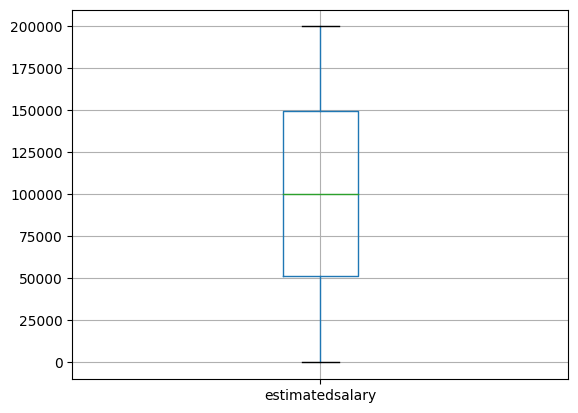

In [22]:
data.boxplot('estimatedsalary')

а где выбросы)? меня очень смущает , я бы на самом деле проводил бы обучения без этого столбца , так как система имеет ошибки , я уберу людей с предполагаемым доходом ниже 2000 , а то плакать хочется

In [23]:
data = data[data['estimatedsalary']>= 100] 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9087 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      9087 non-null   int64  
 1   geography        9087 non-null   object 
 2   gender           9087 non-null   object 
 3   age              9087 non-null   int64  
 4   tenure           9087 non-null   float64
 5   balance          9087 non-null   float64
 6   numofproducts    9087 non-null   int64  
 7   hascrcard        9087 non-null   int64  
 8   isactivemember   9087 non-null   int64  
 9   estimatedsalary  9087 non-null   float64
 10  exited           9087 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 851.9+ KB


хотя может проведу доп пунктом для интереса , ибо эти данные уж слишком плохо себя показывают (удалю столбец с доходом , спойлер не убрал , хотел закончить до конца дня) 

In [24]:
data['exited'].value_counts()

0    7235
1    1852
Name: exited, dtype: int64

вроде не нарушил баланс классов (4:1), но мне кажется я сделал ошибку , ведь к нам в будущем могут обратиться люди с доходом 10руб , нужно было сначало расфасовать на выборки тестовые валид и обуч , и только после этого из обучающей убрать эти значения странные , а в тестовой оставить 

## Исследование задачи

In [25]:
#data = pd.get_dummies(data,columns = ['geography','gender'],drop_first = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9087 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      9087 non-null   int64  
 1   geography        9087 non-null   object 
 2   gender           9087 non-null   object 
 3   age              9087 non-null   int64  
 4   tenure           9087 non-null   float64
 5   balance          9087 non-null   float64
 6   numofproducts    9087 non-null   int64  
 7   hascrcard        9087 non-null   int64  
 8   isactivemember   9087 non-null   int64  
 9   estimatedsalary  9087 non-null   float64
 10  exited           9087 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 851.9+ KB


гендер и страны готовы к скармлеванию модели 

In [27]:
target = data['exited']
features = data.drop('exited',axis = 1)

In [28]:
target_train,target_test,features_train,features_test = train_test_split(target,features,test_size=0.2,random_state=1,stratify=target)

In [29]:
scaler = StandardScaler()

оно само приведёт к стандартному виду

In [30]:
logistic = LogisticRegression(max_iter=10000, tol=0.1)

In [31]:
preprocessor = ColumnTransformer(transformers =[
    ('ohe',OneHotEncoder(drop = 'first'), features.select_dtypes(exclude='number').columns)
    ], remainder ='passthrough'
)
pipe = Pipeline(steps=[("preprocessor",preprocessor) , ("logistic", logistic)])

In [32]:
param_grid = {
    "logistic__C": np.logspace(-4, 4, 4),
}

In [33]:
search = GridSearchCV(pipe, param_grid, n_jobs=2,scoring='f1') #V2
search.fit(features_train, target_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.095):
{'logistic__C': 0.046415888336127774}


круть 0.095 , с линейкой далеко не уйдём , тогда лес)

In [34]:
pipe_forest = Pipeline([
    ("preprocessor",preprocessor),
    ("clf", RandomForestClassifier(random_state = 23))
])

In [35]:
param_grid_forest = {
    "clf__n_estimators": [100],
    "clf__max_depth": [1, 5, 10, 25],
    "clf__max_features": [*np.arange(0.1, 1.1, 0.1)],
}

In [36]:
search_forest = GridSearchCV(pipe_forest, param_grid_forest , n_jobs=2,scoring=['f1', 'roc_auc'],refit = 'f1')
search_forest.fit(features_train, target_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         Index(['geography', 'gender'], dtype='object'))])),
                                       ('clf',
                                        RandomForestClassifier(random_state=23))]),
             n_jobs=2,
             param_grid={'clf__max_depth': [1, 5, 10, 25],
                         'clf__max_features': [0.1, 0.2, 0.30000000000000004,
                                               0.4, 0.5, 0.6,
                                               0.7000000000000001, 0.8, 0.9,
                                               1.0],
                         'clf__n_estimators': [100]},
             refit='f1', scoring=['f1', 'roc_auc'])

In [37]:
print("Best parameter (CV score=%0.3f):" % search_forest.best_score_)
print(search_forest.best_params_)

Best parameter (CV score=0.576):
{'clf__max_depth': 10, 'clf__max_features': 0.9, 'clf__n_estimators': 100}


In [38]:
result = pd.DataFrame(search_forest.cv_results_)
print(result['mean_test_roc_auc'].sort_values(ascending = False).head())
result['mean_test_roc_auc'].sort_values().head()

23    0.861481
24    0.859713
22    0.859638
25    0.859483
26    0.858798
Name: mean_test_roc_auc, dtype: float64


9    0.714537
8    0.756534
7    0.766014
6    0.774863
5    0.784991
Name: mean_test_roc_auc, dtype: float64

roc auc ближе к 1 , чем к 0.5 , это означает что модель как-то работает

## Борьба с дисбалансом

In [39]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=545)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [40]:
pipe_forest_balance = Pipeline([
    ("preprocessor",preprocessor),
    ("smt", SMOTE(random_state=442) ), #V2
    ("clf", RandomForestClassifier(random_state = 25))
])

In [41]:
param_grid_forest = {
    "clf__n_estimators": [100],
    "clf__max_depth": [1, 5, 10, 15],
    "clf__max_features": [*np.arange(0.1, 1.1, 0.1)],
}

In [42]:
search_forest_balance = GridSearchCV(pipe_forest_balance, param_grid_forest , n_jobs=2,scoring=['f1', 'roc_auc'],refit = 'f1')
search_forest_balance.fit(features_train, target_train)#V2

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         Index(['geography', 'gender'], dtype='object'))])),
                                       ('smt', SMOTE(random_state=442)),
                                       ('clf',
                                        RandomForestClassifier(random_state=25))]),
             n_jobs=2,
             param_grid={'clf__max_depth': [1, 5, 10, 15],
                         'clf__max_features': [0.1, 0.2, 0.30000000000000004,
                                               0.4, 0.5, 0.6,
                                               0.7000000000000001, 0.8, 0.9,
                                               1.0],
                         'clf__n_estimators': [100]},
             refit='f1', scoring=['f1', 'roc_auc'])

тестировал также до 1000 деревьев 

In [43]:
print("Best parameter (CV score=%0.3f):" % search_forest_balance.best_score_)
print(search_forest_balance.best_params_)

Best parameter (CV score=0.610):
{'clf__max_depth': 10, 'clf__max_features': 1.0, 'clf__n_estimators': 100}


In [44]:
result_forest = pd.DataFrame(search_forest_balance.cv_results_)
print(result_forest['mean_test_roc_auc'].sort_values(ascending = False).head())
result_forest['mean_test_roc_auc'].sort_values().head()

23    0.857707
25    0.857466
24    0.857329
27    0.857279
26    0.856061
Name: mean_test_roc_auc, dtype: float64


9    0.710392
0    0.744204
8    0.760326
7    0.766593
6    0.769231
Name: mean_test_roc_auc, dtype: float64

вывод : случайный лес для этой задачи подходит больше чем логистическая регрессия (подробности в общем выводе)

## Тестирование модели

In [45]:
best_model_forest_balance = search_forest_balance.best_estimator_
ans_forest_balance = best_model_forest_balance.predict(features_test)
accuracy_forest_balance = accuracy_score(target_test,ans_forest_balance)
accuracy_forest_balance

0.8542354235423543

In [46]:
f1_score_forest_balance = f1_score(target_test,ans_forest_balance)
f1_score_forest_balance

0.6262341325811002

f1 = 0.626 , не плохо

In [47]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    results = grid.cv_results_
    means_test = results['mean_test_f1']
    stds_test = results['std_test_f1']
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))
    params=grid.param_grid
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())

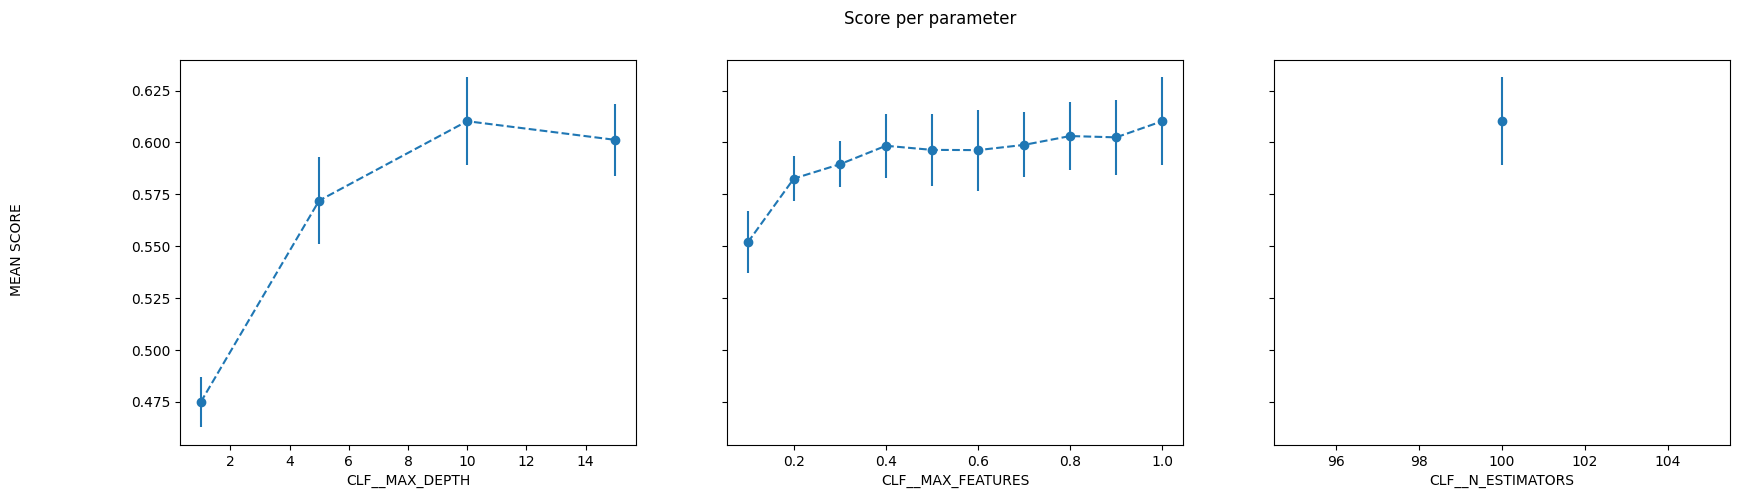

In [48]:
plot_search_results(search_forest_balance)

видно что переучивается

In [49]:
probabilities = best_model_forest_balance.predict_proba(features_test)
probabilities

array([[0.98517816, 0.01482184],
       [0.90559582, 0.09440418],
       [0.42443938, 0.57556062],
       ...,
       [0.19288089, 0.80711911],
       [0.75248984, 0.24751016],
       [0.88177301, 0.11822699]])

In [50]:
roc_auc_score = roc_auc_score(target_test,probabilities[:,1]) #v2
roc_auc_score

0.8618658922540734

Roc-auc 0.86 не так уж и плохо

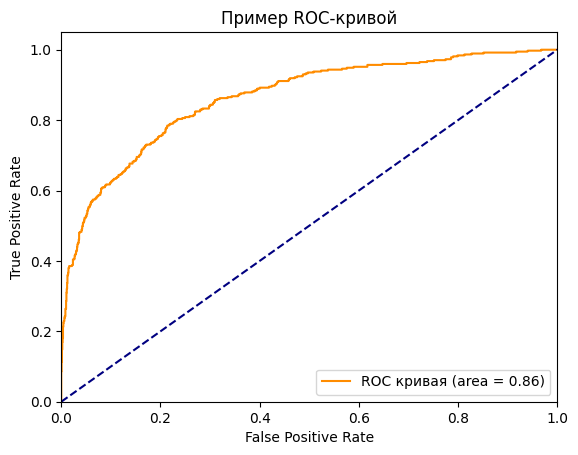

In [51]:
fpr, tpr, treshold = roc_curve(target_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

<b>вывод:</b>
<br>основная информация с которой мы работали это столбец Exited (целевая переменная) , также задействовали все столбцы кроме RowNumber , CustomerId и Surname
<br>итог эксперементов с моделями:на данный момент лес показался оптимальной моделью , но он слишком долгий в работе , в итоге получили ( F1 = 0.625) 
<br>линеная регрессия , пока не расскрыла свой потенциал (F1 = 0.075)